**Regression Types**

1) Logistic Regression

2) Decision Tree or Random Forest



**Logistic Regression**

In [8]:
# Let's start w/ logistic regression
import pandas as pd

loan_df = pd.read_csv('//content/drive/MyDrive/JP Morgan Quantitative research/Task 3 and 4_Loan_Data.csv')
loan_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Split the data into features and target
X = loan_df.drop(['default', 'customer_id'], axis=1)
y = loan_df['default']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the Logistic Regression model
log_reg.fit(X_train, y_train)

# Predict probabilities of default
probabilities = log_reg.predict_proba(X_test)[:, 1]
probabilities

array([8.34142458e-08, 9.80342518e-03, 9.99999926e-01, ...,
       7.36163767e-09, 7.88599746e-08, 7.99863262e-08])

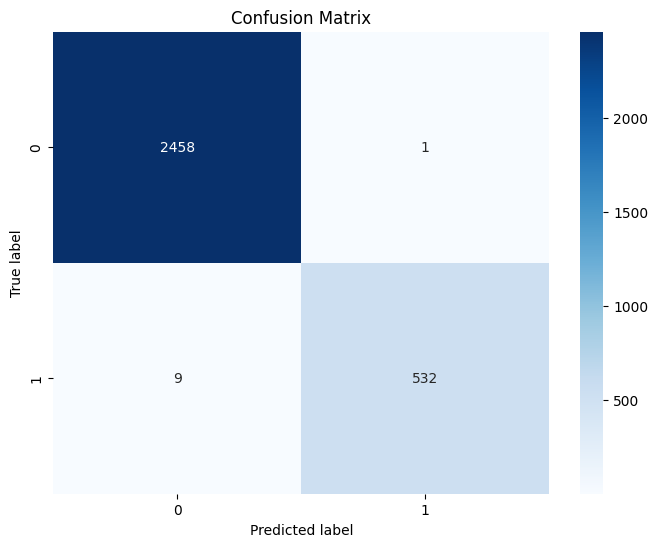

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the class labels for the test set
y_pred = log_reg.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()



In [11]:
# Get coefficients

# Get the feature names from the Logistic Regression model
feature_names = X.columns

# Get the coefficients of the Logistic Regression model
coefficients = log_reg.coef_[0]

# Create a Dataframe to hold feature names and their corresponding coefficients
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Print out the sorted features
coeff_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
0,credit_lines_outstanding,8.518931
2,total_debt_outstanding,3.685591
1,loan_amt_outstanding,0.145166
5,fico_score,-1.175821
3,income,-2.315660
4,years_employed,-2.768698


In [12]:
# Logistic Regression Expected Loss Function

def calculate_expected_loss(model, scaler, features, recovery_rate=0.1):

    """
    Calculate the expected loss for a loan.

    Parameters:
    - model: The trained logistic regression
    - scalar: The StandardScaler instance used to scale the training data.
    - features: A list or array of features for the individual borrower.Order of features:
        ['credit_lines_outstanding','loan_amt_outstanding','total_debt_outstanding','income','years_employed']
    -recovery_rate: The recovery rate in the event of a default.

    Returns:
    - expected_loss: The expected loss for a loan.
    """

    # Scale the featuures using the provided scalar
    features_scaled = scaler.transform([features])

    # Predict the probabability of default
    probability_of_default = model.predict_proba(features_scaled)[:, 1][0]

    # Calculate the expected loss
    LGD = 1 - recovery_rate  # Loss Given Default

    # Exposure At Default is the loan_amt_outstanding - note that this feature BEFORE scaling
    EAD = features[1]
    expected_loss = LGD * EAD * probability_of_default

    return expected_loss

# Test a borrower's features
borrower_features = [5,1958.928726, 8228.752520, 26648.43525, 2, 572]

# Calculate the expected loss for this borrower
borrower_expected_loss = calculate_expected_loss(log_reg, scaler, borrower_features)
borrower_expected_loss

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(1763.0351416946803)

**Decision Tree**

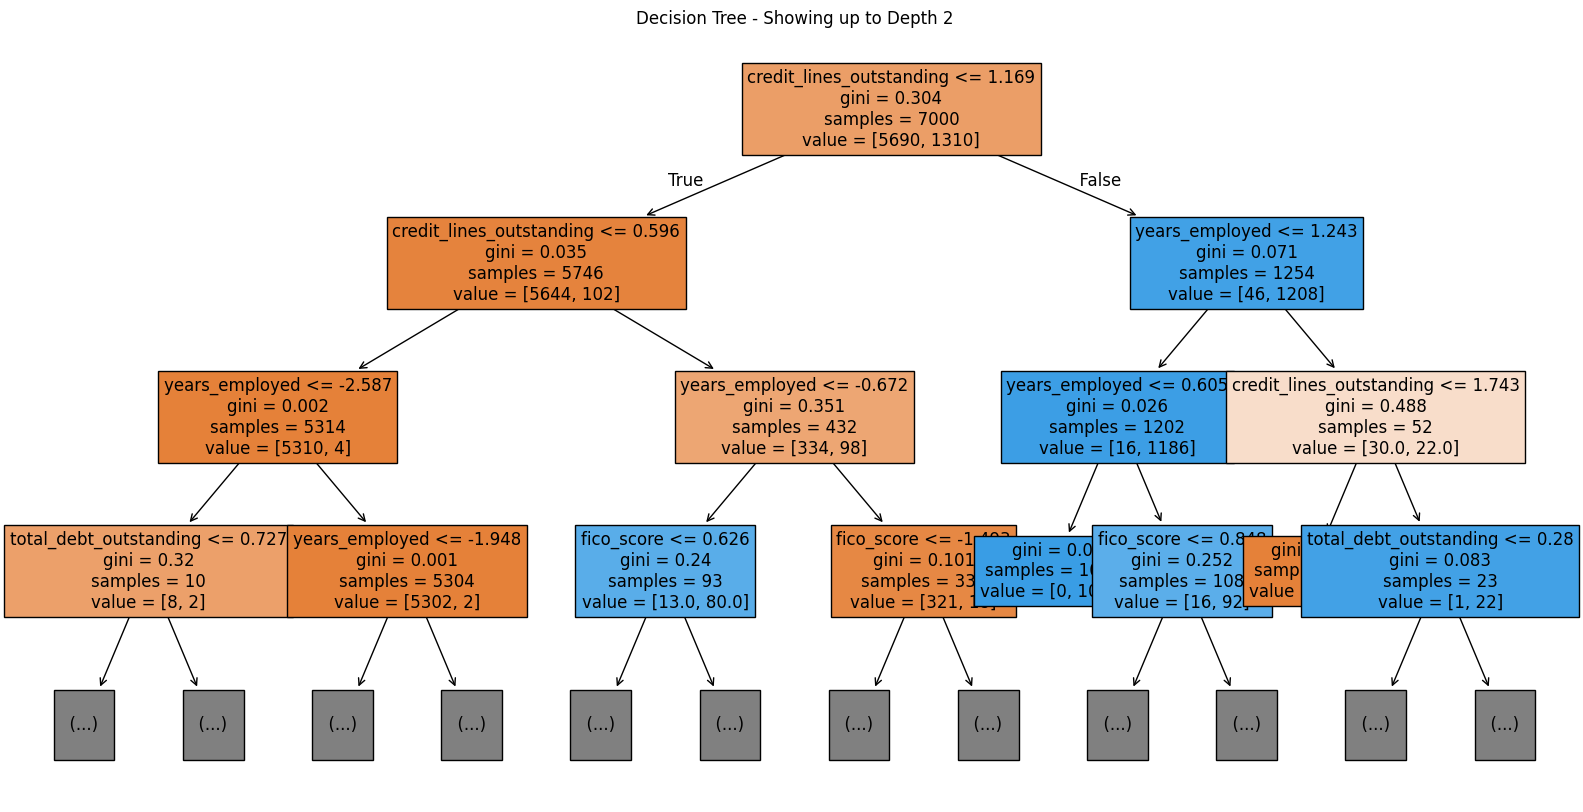

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier , plot_tree

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
decision_tree.fit(X_train, y_train)

# plot the top of the Decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=feature_names, max_depth=3, fontsize=12)
plt.title('Decision Tree - Showing up to Depth 2')
plt.show()


In [15]:
# Extract Information about the decision path within the tree, focusing on the leaf nodes.
n_nodes=decision_tree.tree_.node_count
children_left=decision_tree.tree_.children_left
children_right=decision_tree.tree_.children_right
feature=decision_tree.tree_.feature
threshold=decision_tree.tree_.threshold

# Get this ids of the leaf nodes
leaf_ids = [node_id for node_id, left_child in enumerate(children_left) if left_child == -1]

# Initialize an empty list to hold the leaf information
leaf_samples = []

# Iterate over each leaf node
for leaf_id in leaf_ids:
    # Get the number of samples at the given leaf
    samples = decision_tree.tree_.value[leaf_id, 0]
    # Append the leaf information to our list
    leaf_samples.append(samples)

# Now leaf_samples contains the counts of [class_0, class_1] for all leaves
leaf_samples



[array([1., 0.]),
 array([0., 1.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0., 1.])]

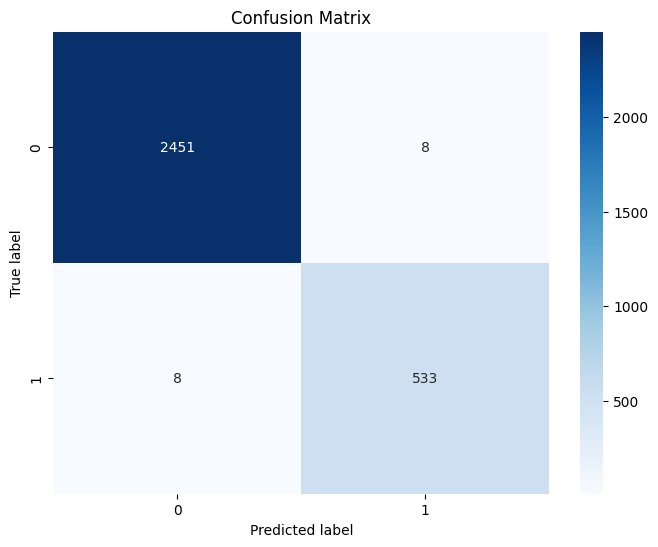

In [16]:
# We get a slightly more balanced result than the logistic regression output

# Predict the class labels for the test set
y_pred2 = decision_tree.predict(X_test)

# Compute the confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred2)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# We can actually re-use the function from above
# by plugging in our new Decision Tree model rather than a logistic Regression
borrower_features = [5,1958.928726, 8228.752520, 26648.43525, 2, 572]

# Example usage with the Decision Tree model
borrower_expected_loss_dt = calculate_expected_loss(decision_tree, scaler, borrower_features)
borrower_expected_loss_dt

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(1763.0358534000002)